# Decomposição SVD

Alunos

## 1. Teoria

*Escrever um resumo de algumas poucas linhas sobre SVD

### **Teorema 1**

Toda matriz $ A \in \mathbb{M(n,m)} $  e posto $p$ pode ser decomposta:
$$ A = U \Sigma  V^{T} $$
em que  $ U \in \mathbb{M(n,p)} $  e  $ V \in \mathbb{M(m,p)} $  são ortonormais nas colunas e $ \Sigma \in \mathbb{M(m,n)} $ é igual $diag(\sqrt(\lambda_{i}))$ tal que $\lambda_{i} > 0$. Sendo $\lambda_{1},\lambda_{2},\ldots,\lambda_{p}$ os autovalores não nulos das matrizes $AA^T$, $U$ e $V$ matrizes de $p$ autovalores ortonormais por coluna.

*Reescrever para não ficar igual ao artigo:

Observação: Os elementos diagonais da matriz Λ são denominados valores singulares da matriz
𝐴. Usualmente os valores singulares são listados em ordem decrescente. Assim, a matriz diagonal Λ
é unicamente determinada para 𝐴, entretando as matrizes 𝑈 e 𝑉 não são unicamente determinadas,
consideraremos que na decomposição SVD os elementos diagonais da matriz Λ estão listados em
ordem decrescente.

Pode-se aplicar a SVD para aproximar uma matriz retangular 𝐴 de posto 𝑟 utilizando uma matriz
retangular ˜𝐴 de posto 𝑘 ≤ 𝑟. Considera-se o problema de minimizar a norma de Frobenius da
diferença entre 𝐴 e ˜𝐴 para a qual exige-se que o posto de ˜𝐴 seja igual a 𝑘 (GOLUB; VAN LOAN,
1996; STEWART, 1993). Desta forma, pode-se enunciar o chamado Teorema de Eckart–Young
(ECKART; YOUNG, 1936).

### **Teorema 2**
A matriz $\tilde{A}$ é obtida pela fatoração $SVD$ da matriz $A$, ou seja,
$$ \tilde{A} = U\tilde{\Sigma}V^T = \Sigma^k_{i=1}\sigma_{i}u_{i}v_{i},$$
em que $u_{i}$ e $v_{i}$ denotam a i-ésima coluna de $U$ E $V$, respectivamente; $\tilde{\Sigma}$ coincide com $\Sigma$ nos $k$ maiores valores singulares os demais valores singulares são substituídos por zero na diagonal de $\tilde{\Sigma}$.

## 2. Aplicação em compreesão de imagem

### 2.1 Explicação
Cap 3 do artigo

### 2.2 Exemplo

Para a resolução dessa questão, utiliza-se uma imagem de dimensões 128x128.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #Biblioteca em python para manipular imagens
%matplotlib inline

Carrega a imagem original colorida

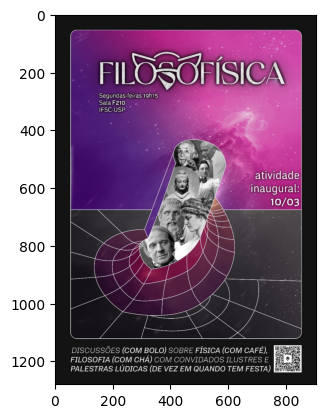

In [ ]:
imagem = Image.open("/content/IMG-20250307-WA0192.jpg")

plt.imshow(imagem)

Converte a imagem para preto e branco para que possamos aplicar a decomposição SVD

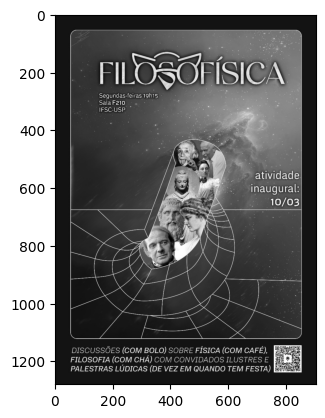

In [ ]:
imagemPB = imagem.convert('LA')

plt.imshow(imagemPB)

Transforma a imagem em um array

In [ ]:
A = np.asarray(imagemPB)[:,:,0]
print(f'A imagem original tem dimensão {A.shape}')

A imagem original tem dimensão (1280, 904)


Utilizando a função linalg.matrix_rank para calcular o posto da matriz A

In [ ]:
postoA = np.linalg.matrix_rank(A)
print(f'Como A tem posto {postoA} temos {postoA} autovalores positivos')

Como A tem posto 809 temos 809 autovalores positivos


Utiliza a função linalg.svd da biblioteca numpy para fazer a decomposição

In [ ]:
U,S,Vt = np.linalg.svd(A)
print(f'As dimensões das matrizes da U, Sigma e Vt da decomposição são {U.shape}, {S.shape} e {Vt.shape} respectivamente')

As dimensões das matrizes da U, Sigma e Vt da decomposição são (1280, 1280), (904,) e (904, 904) respectivamente


Como a função retorna um vetor, vamos transformar S em uma matriz diagonal

S agora tem dimensão (904, 904)


Definimos quantos valores singulares iremos considerar na equação

In [ ]:
k = 20
Sk=np.diag(S[:k])
print(f'S agora tem dimensão {S.shape}')

S agora tem dimensão (904, 904)


Utiliza o Teorema 2 para comprimir a imagem

In [ ]:
SkVt = np.dot(Sk,Vt[0:k,:])
Ak = np.dot(U[:,0:k],SkVt)

ValueError: shapes (1280,20) and (904,) not aligned: 20 (dim 1) != 904 (dim 0)

Imprime a imagem original junto da comprimida

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
f,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(A,cmap='gray')
ax1.set_title('Imagem Original')

ax2.imshow(Ak,cmap='gray')
ax2.set_title('Imagem Comprimida')

Utiliza o número de bits para calcular a porcentagem de compressão.

In [ ]:
bits_original = A.shape[0]*A.shape[1]*16

print('Bits da imagem original: ',bits_original)

bits_comprimido = 16*k*(A.shape[0]+A.shape[1]+1)

print('Bits da imagem comprimida: ',bits_comprimido)

print('Porcentagem de compressão: ', 100-bits_comprimido*100/bits_original)

*Podemos deixar desse modo o cálculo de compressão, mas da pra fazer manual como no artigo